# CardioGoodFitness - Project
## Background
Everyone is different in regards to fitness.  As a result different people will purchase different treadmills.  Someone who is very fit may seek different attributes in a treadmill versus someone who is very unfit. We can implement data analysis techniques to make business decisions on our treadmills. 

## Objective
Perform data analysis, including univariate and multivariate analysis, to derive some observations from the CardioGoodFitness dataset.  I will develop a customer profile that each product appeals to.  I will give insights based on the provided data to give the company ideas on how to target their new customers.  We can use this data to find strengths and weaknesses in their products for select types of people.

## Key Question to Answer
What type of person, or customer, will buy each treadmill?



## Dataset
The lines below give a brief definition of each variable:

Product: The treadmill product model number.

Age: The age of the customer, expressed in years.

Gender: the gender of the customer, expressed in male or female.

Education: The education level of the customer expressed in years.

Marital Status: the marital status of the customer, expressed as single or partnered.

Usage: The average number of times that the customer uses the treadmill during the week.

Fitness: a score expressing the level of fitness given by the customer (1 = very unfit. 5 = very fit).

Income: The amount of money earned by the customer in a year.

Miles: The expected amount of miles ran.

In [2]:
#To help make our code look less cluttered, this removes the warnings that pop up.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the packages for this project

import pandas as pd # a core library for data analysis.  It builds on NumPy
import numpy as np # a more advanced mathematical package.
import seaborn as sns # a data visualization tool in python
import matplotlib.pyplot as plt # a plot library
%matplotlib inline 

In [4]:
# Reading our .csv dataset titled "CardioGoodFitness"
data = pd.read_csv('CardioGoodFitness.csv')

# Making a copy of the data, so we are not editing the original
cardiodata=data.copy()


In [5]:
# Cleaning the dataset by getting rid of missing values, if applicable
cardiodata = cardiodata.dropna()

#Giving us the shape of the data. That is, how many rows and columns in the dataset.
cardiodata.shape

(180, 9)

### Observation
It looks like there are 180 individuals given in the CardioGoodFitness dataset. There are 9 total columns.

After looking at the .csv and doing some of the code above, it appears that this data is pretty clean as it is.  There isn't incomplete variables with missing values.

In [5]:
# Give us a quick glance at the data, this is the first 5 entries in the sample. Its great to see what we are working with!
cardiodata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
#Showing the data type of each variable in the dataset.  Give us some insight on the dataset properties.
cardiodata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.1+ KB


In [7]:
#Converting the Product, Gender, and MaritalStatus columns from "object" to "category".  This helps us with data space.
#The rest of the variables are going to remain as integers.
cardiodata["Product"]=cardiodata.Product.astype("category")
cardiodata["Gender"]=cardiodata.Gender.astype("category")
cardiodata["MaritalStatus"]=cardiodata.MaritalStatus.astype("category")
cardiodata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 10.7 KB


In [8]:
#This gives us a great overview of some very useful numbers for our data. We will reference this table to make 
#our recommendations for the company. This helps us figure out how "good" our data is.
cardiodata.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## EDA

In [9]:
# Showing the correlation between several variables. # Named the variable correlation so I can plot the heatmap.
correlation = cardiodata.corr()
cardiodata.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

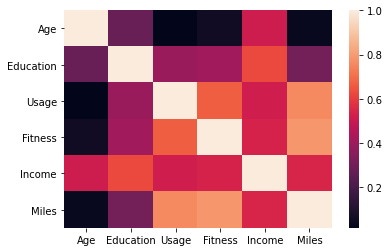

In [10]:
# Using a heatmap to visualize the correlation chart 
sns.heatmap(correlation)

### Observation
It appears that there is correlation between the following:

-Miles and Usage

-Miles and Fitness

-Income and Education

Note: None of these observations are really surprising.  There is also a mild correlation between age and fitness.

In [11]:
#Gives us the mean for each of the numerical datatypes. These figures are good to keep in mind when looking at the dispersion.
#I obtained these earlier, but I like them separated while doing univariate analysis.
cardiodata.mean()

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [12]:
#Gives us the median for each of the nuemrical datatypes.  Like the mean, we will use this when looking at dispersion.
cardiodata.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

# Univariate Analysis

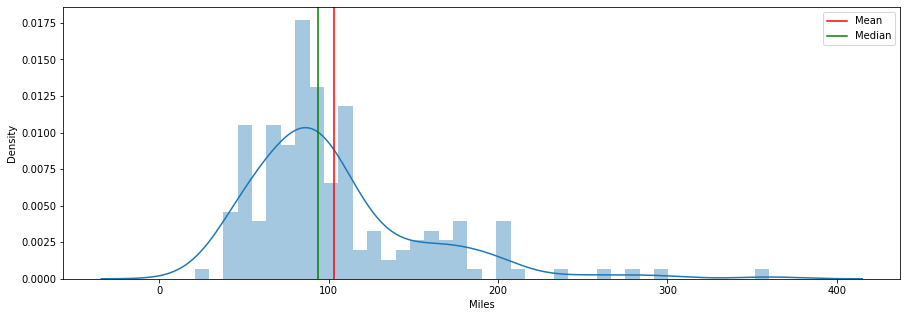

In [13]:
# Univariate distribution to show the miles amongst the sample via histogram

plt.figure(figsize=(15,5))
sns.distplot(cardiodata['Miles'], bins=40)
plt.axvline(np.mean(cardiodata['Miles']), color="r", label="Mean")
plt.axvline(np.median(cardiodata['Miles']), color="g", label="Median")
plt.legend()

### Observation

There are a few outliers on the high mileage side.
The mean is to the right of the median, indicating a positive skew.
The range is 339 miles

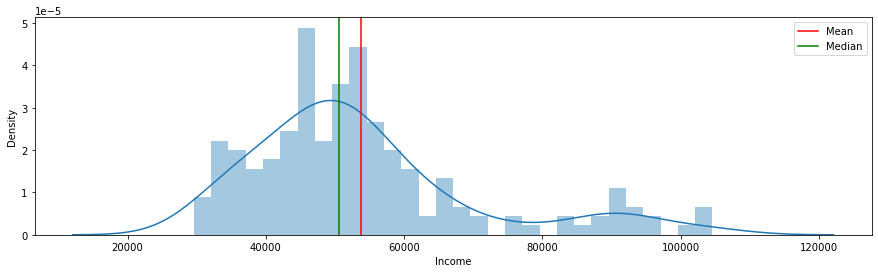

In [14]:
# Univariate distribution to show the income amongst the sample via histogram

plt.figure(figsize=(15,4))
sns.distplot(cardiodata['Income'], bins=30)
plt.axvline(np.mean(cardiodata['Income']), color="r", label="Mean")
plt.axvline(np.median(cardiodata['Income']), color="g", label="Median")
plt.legend()

### Observation

Most of the income is based between the 40,000-60,000 range.

The mean is to the right of the median, indicating a positive skew.

The range is 75,019 for income

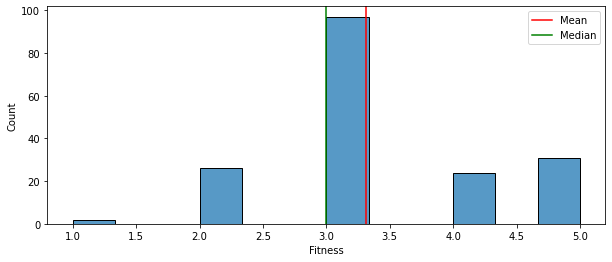

In [15]:
# Univariate distribution to show the fitness level amongst the sample via histogram
plt.figure(figsize=(10,4))
sns.histplot(cardiodata['Fitness'])
plt.axvline(np.mean(cardiodata['Fitness']), color="r", label = "Mean")
plt.axvline(np.median(cardiodata['Fitness']), color="g", label="Median")
plt.legend()

### Observation
A large majority of the sample puts themselves in the middle at 3.

Only two individuals in the sample put themselves at 1. On the other hand, 31 individuals put themselves at 5.

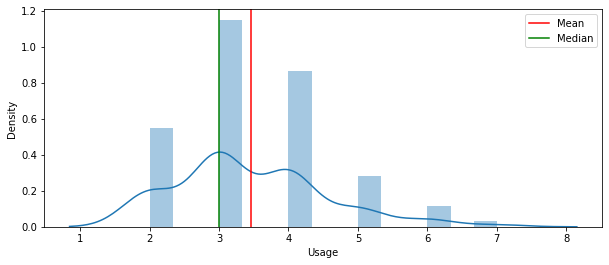

In [16]:
# Univariate distribution to show the usage level amongst the sample via histogram
plt.figure(figsize=(10,4))
sns.distplot(cardiodata['Usage'])
plt.axvline(np.mean(cardiodata['Usage']), color="r", label="Mean")
plt.axvline(np.median(cardiodata['Usage']), color="g", label="Median")
plt.legend()

### Observation
Most runners see themselves using it around half the week.

Only two runners use it 7 days a week.


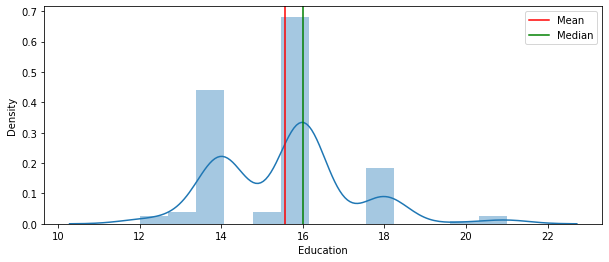

In [17]:
# Univariate distribution to show the education level amongst the sample via histogram
plt.figure(figsize=(10,4))
sns.distplot(cardiodata['Education'])
plt.axvline(np.mean(cardiodata['Education']), color="r", label="Mean")
plt.axvline(np.median(cardiodata['Education']), color="g", label="Median")
plt.legend()

### Observation
Most runners are either at 14 or 16 years of education.
There are a couple outliers located at the 20 year and longer point.

3 individuals have 21 years, and 3 have 12.  The range on education is 9.

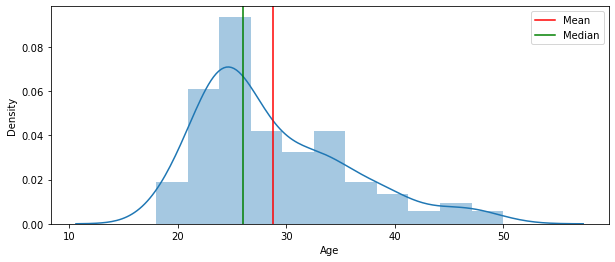

In [18]:
# Univariate distribution to show the age level amongst the sample via histogram
plt.figure(figsize=(10,4))
sns.distplot(cardiodata['Age'])
plt.axvline(np.mean(cardiodata['Age']), color="r", label="Mean")
plt.axvline(np.median(cardiodata['Age']), color="g", label="Median")
plt.legend()

### Observation
The range for age is 32.

The youngest is 18, and the oldest is 50.

The average age is 28.8. The median is 26. This gives us a positive skew with the mean being greater than the median.

<AxesSubplot:xlabel='Gender', ylabel='count'>

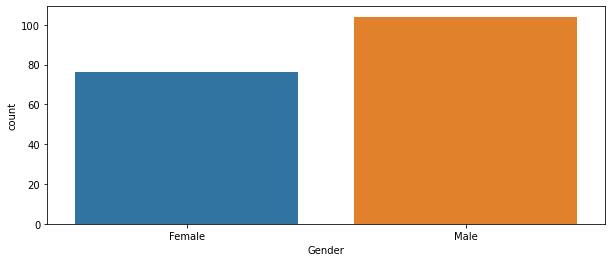

In [19]:
# Univariate distribution to show the age amongst the sample via histogram
plt.figure(figsize=(10,4))
sns.countplot(cardiodata['Gender'])

### Obseravation
There seems to be more males in the sample than females.  This is a flaw in the data. In a perfect world, the sample would be even in regards to gender. We will explore this deeper with multivariate analysis. Maybe we can use gender to our advantage in recommendations to the CEO.

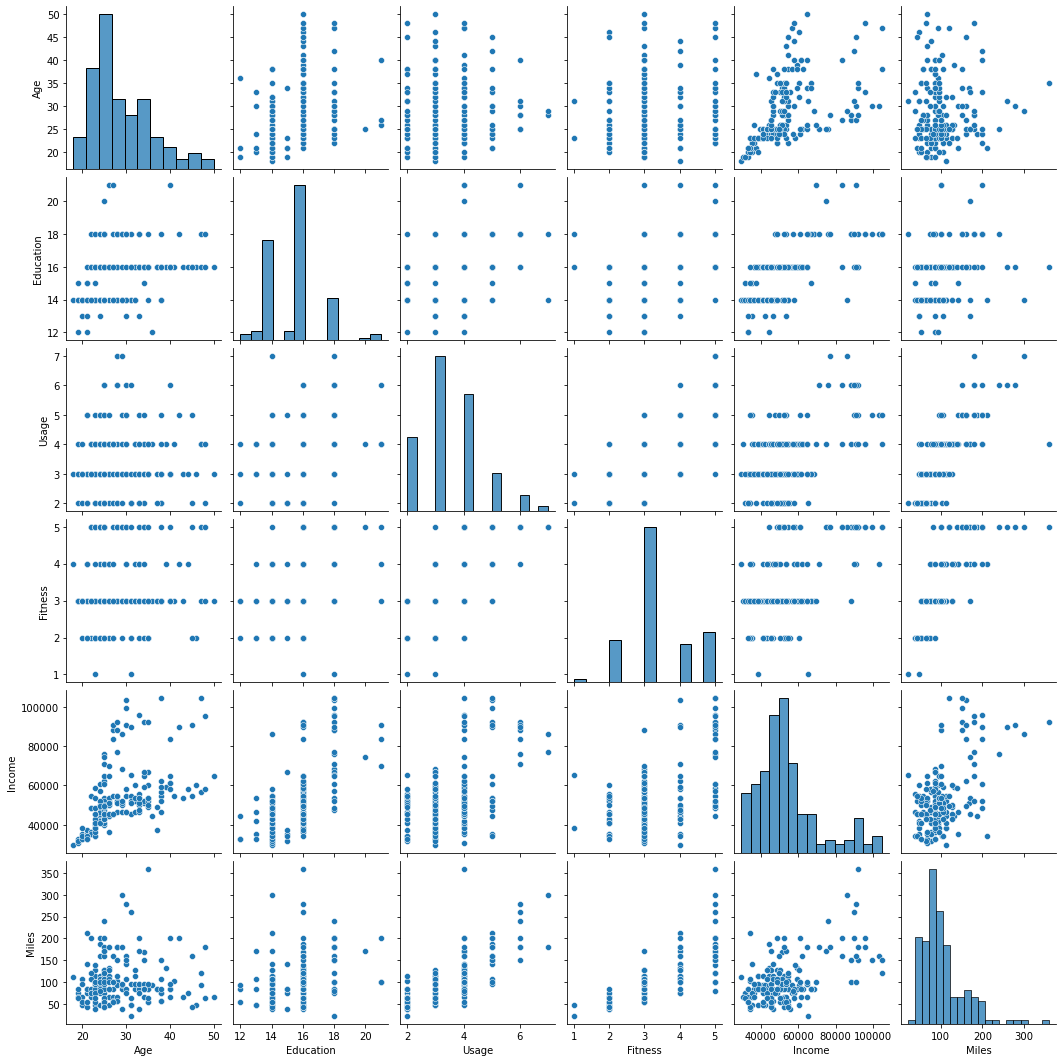

In [20]:
# I am using a pairplot to give a big picture on the relationships between the variables inside our dataset
sns.pairplot(cardiodata)

# Multivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Miles'>

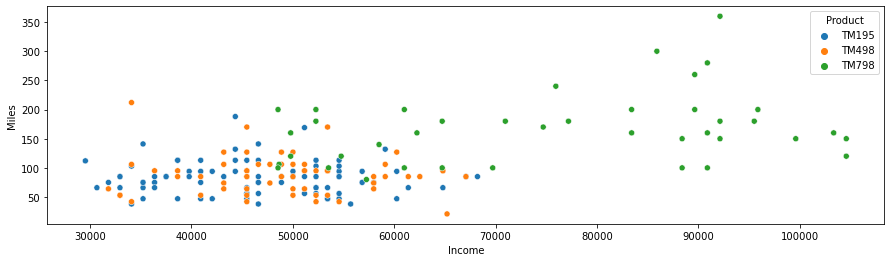

In [21]:
# Looking at outliers in the sample
plt.figure(figsize=(15,4))
sns.scatterplot(cardiodata["Income"],cardiodata["Miles"],hue=cardiodata["Product"])

### Observation
As you can see above, a large majority of the sample is clustered in the bottom left quadrant of the scatterplot.  These hyperactive individuals located outside the cluster are using the TM798 model.  These are outliers to the entire sample, but considering they are all using the TM798 model, it is significant. 

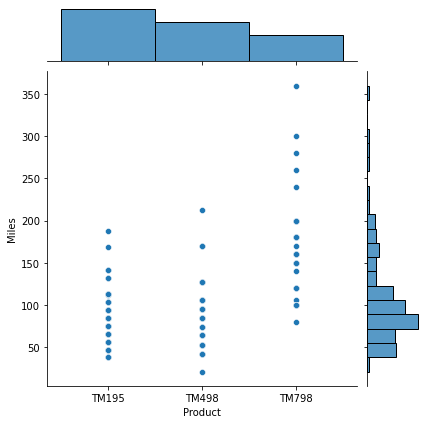

In [22]:
# Bivariate distribution to show the relationship between two variables.  I am using the joint plot for this
sns.jointplot(cardiodata['Product'], cardiodata['Miles'])

### Observation
THis jointplot accurately shows that the TM798 model is logging more miles than the other two models.

<AxesSubplot:xlabel='Product', ylabel='Education'>

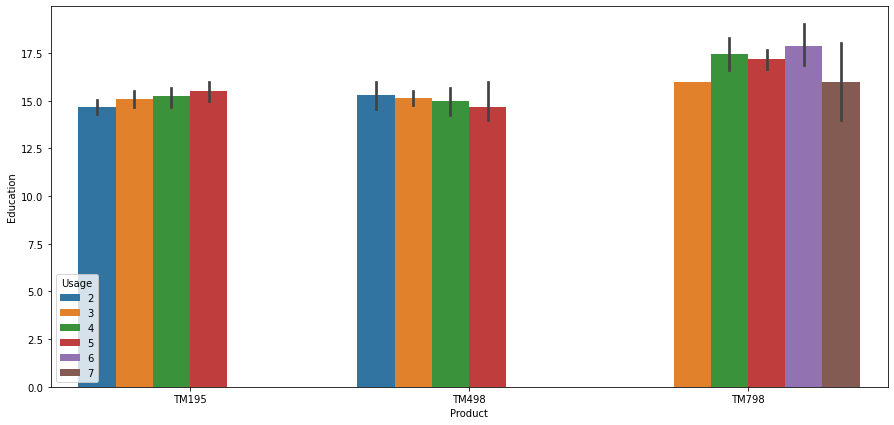

In [23]:
plt.figure(figsize=(15,7))
sns.barplot(cardiodata['Product'], cardiodata['Education'], hue=cardiodata['Usage'])

### Observation
This barplot shows us that education isn't a tremendously big factor for being a high mileage runner. The TM798 users are slightly more educated on average.

<AxesSubplot:xlabel='Product', ylabel='count'>

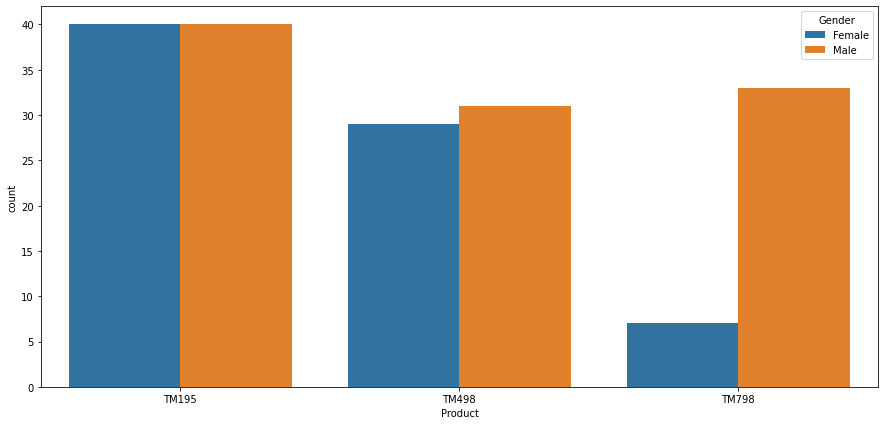

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(cardiodata["Product"], hue=cardiodata["Gender"])

### Observation
It appears that the most miles are ran on the TM798 model.  Also, it is obvious that the TM798 model is mainly used by males.  Based on this test, and the ones ran prior, it is safe to say that the TM798 model is for the most "serious" runner.  It tends to be used by the individuals who run the most and rate themselves as the most fit. Going forward, we need to differentiate the two other models from one another.  This countplot also tells us that TM195 and TM498 do NOT cater to a specific gender.

<AxesSubplot:xlabel='Usage', ylabel='count'>

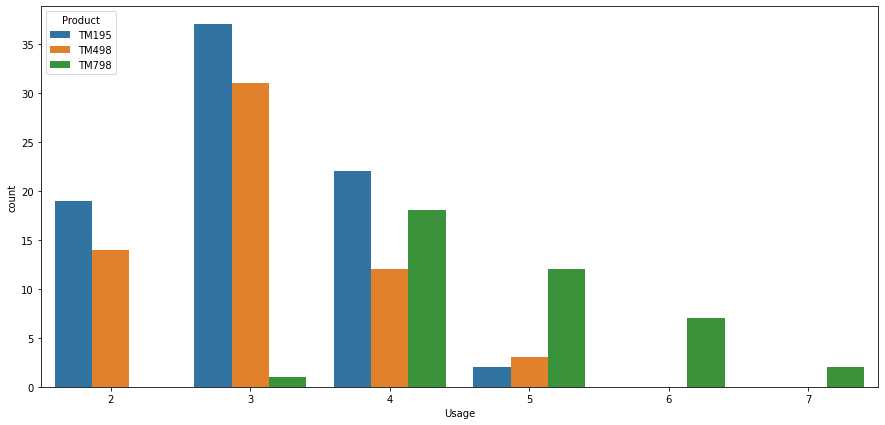

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(cardiodata["Usage"],hue=cardiodata["Product"])


### Observation
It appears that TM195 and TM498 are both used less than the TM798 model.

<AxesSubplot:xlabel='Usage', ylabel='Income'>

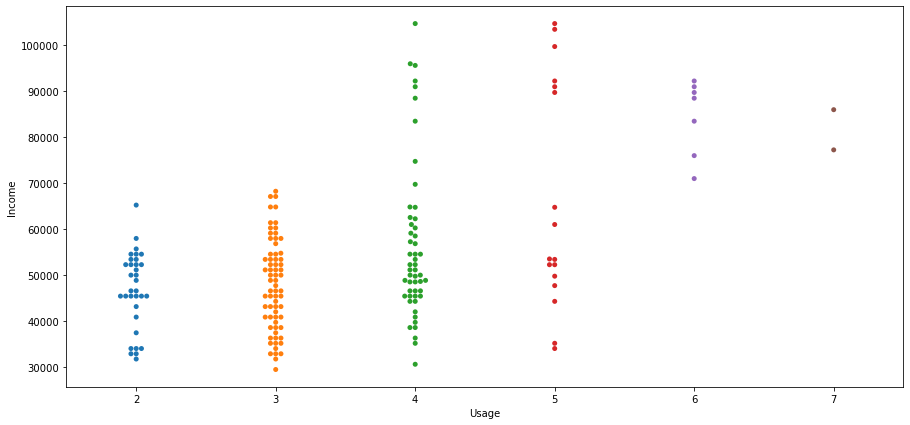

In [26]:
plt.figure(figsize=(15,7))
sns.swarmplot(cardiodata["Usage"],cardiodata["Income"])

<Figure size 1080x504 with 0 Axes>

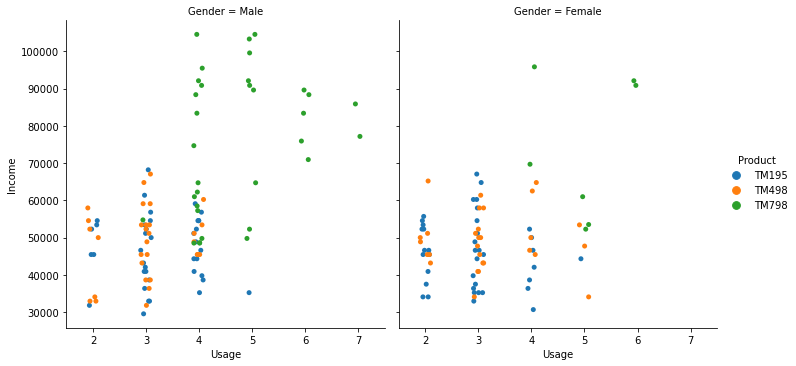

In [10]:
plt.figure(figsize=(15,7))
sns.catplot(x="Usage", y = "Income", hue="Product", col = "Gender", data=cardiodata, kind="strip")

### Observation
The two plots above show us that there is a ton of overlap between TM195 and TM498.  This could be used to determine weaknesses about the product.  We would want to try to make one or the other appeal to a select group of individuals.

In [28]:
#This pandas report gives us some great statistics about are data.  It is very insightful when trying to get a good grasp 
#of the sample.
from pandas_profiling import ProfileReport

report = ProfileReport(cardiodata)
report